# Dfsu and Mesh - Plotting
Demonstrate different ways of plotting dfsu and mesh files. This includes plotting

* outline_only
* mesh_only
* patch - similar to MIKE Zero box contour)
* contour - contour lines
* contourf - filled contours
* shaded

In [1]:
import mikeio
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (10,8)

# Load dfsu file as mesh

In [2]:
filename = '../tests/testdata/FakeLake.dfsu'
msh = mikeio.Mesh(filename)
msh

Flexible Mesh
Number of elements: 1011
Number of nodes: 798
Projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

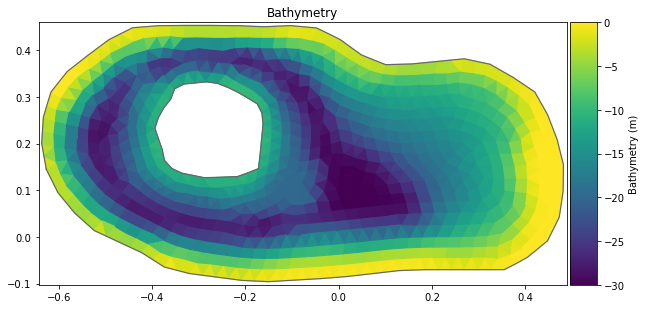

In [3]:
msh.plot();

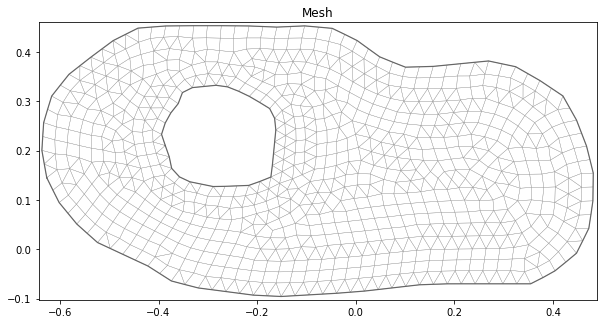

In [4]:
msh.plot.mesh();

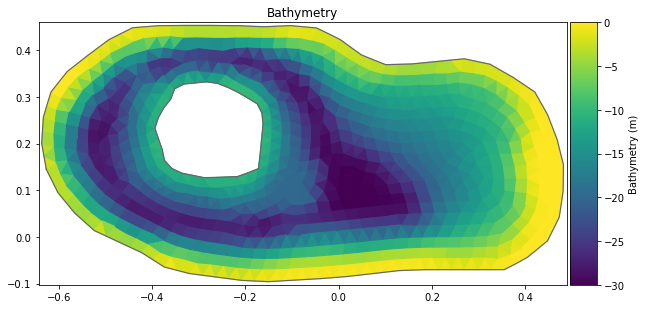

In [5]:
msh.plot(vmin=-30);

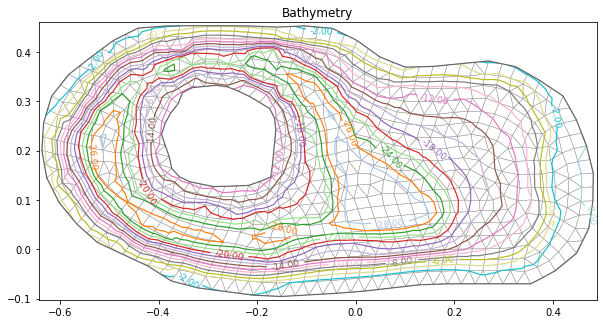

In [6]:
msh.plot.contour(show_mesh=True, levels=16, cmap='tab20', vmin=-30);

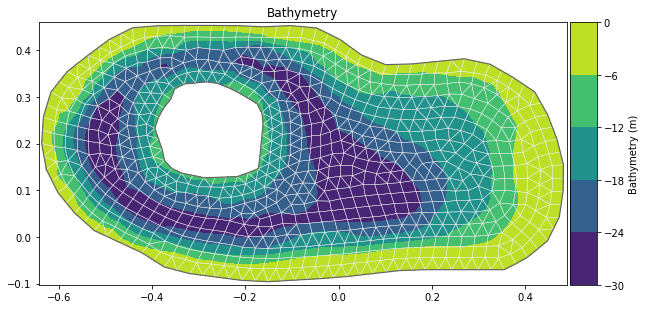

In [7]:
msh.plot(plot_type='contourf', show_mesh=True, levels=6, vmin=-30);

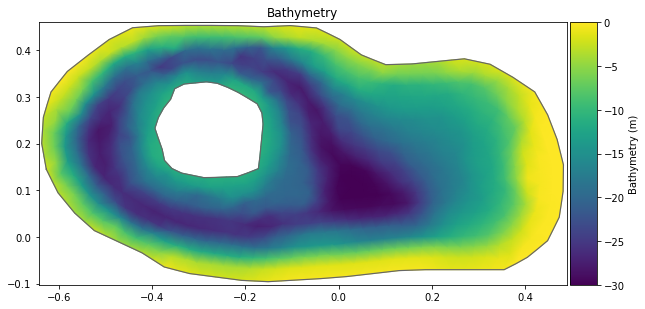

In [8]:
msh.plot(plot_type='shaded', show_mesh=False, vmin=-30);

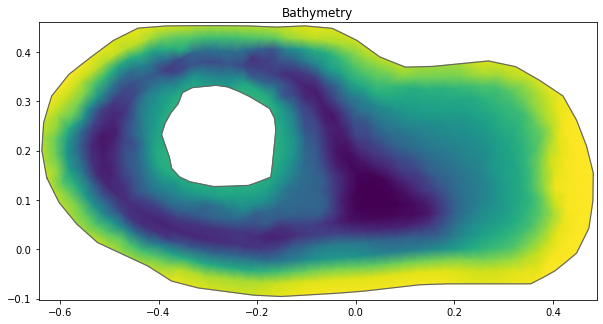

In [9]:
msh.plot(plot_type='shaded', add_colorbar=False);

In [10]:
# TODO: 
# msh.plot(plot_type='patch', elements=range(400,600), show_mesh=False, vmin=-30, figsize=(4,6));

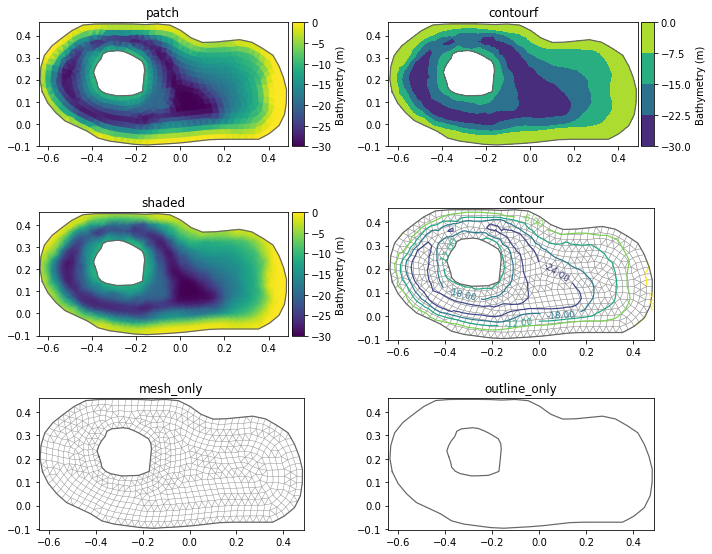

In [11]:
fig, ax = plt.subplots(3,2)

msh.plot(title='patch', ax=ax[0,0]);
#msh.plot.contourf(title='contourf', show_mesh=False, levels=[-30,-24,-22,-10,-8], ax=ax[0,1]);
msh.plot.contourf(title='contourf', levels=5, ax=ax[0,1]);
msh.plot(plot_type='shaded', title='shaded', ax=ax[1,0]);
msh.plot.contour(title='contour', show_mesh=True, levels=6, vmin=-30, ax=ax[1,1]);
msh.plot.mesh(title='mesh_only', ax=ax[2,0]);
msh.plot.outline(title='outline_only', ax=ax[2,1]);

plt.tight_layout()

# Plot data from surface layer of 3d dfsu file

In [12]:
filename = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = mikeio.open(filename)
dfs

Dfsu3DSigmaZ
Number of elements: 17118
Number of nodes: 12042
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

In [13]:
da = dfs.read(items="Salinity", layers="top", time=0)[0]
da

<mikeio.DataArray>
Name: Salinity
Geometry: Dfsu2D
Dimensions: (element:3700)
Time: 1997-09-15 21:00:00 (time-invariant)

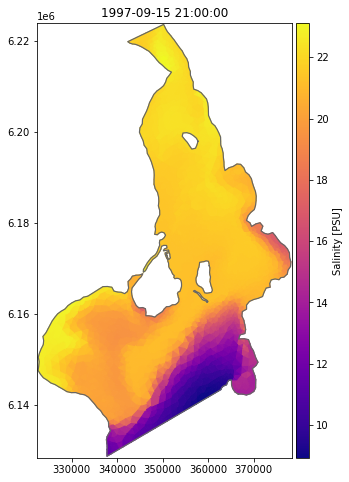

In [14]:
da.plot(cmap='plasma');

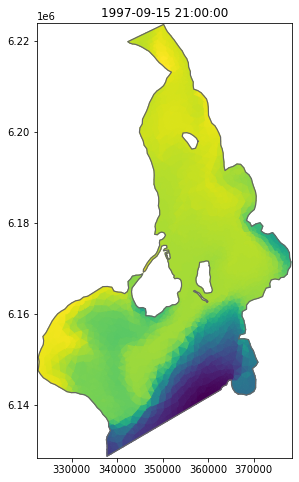

In [15]:
da.plot(add_colorbar=False);

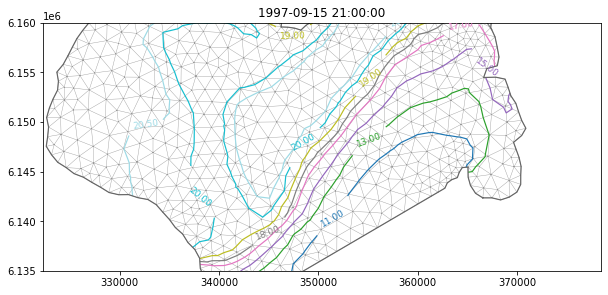

In [16]:
ax = da.plot.contour(show_mesh=True, cmap='tab20', levels=[11,13,15,17,18,19,20,20.5])
ax.set_ylim(6135000,6160000);

# plot data from a z-layer

In [17]:
da = dfs.read(items="Salinity", layers=3, time=0)[0]
da

<mikeio.DataArray>
Name: Salinity
Geometry: Dfsu2D
Dimensions: (element:528)
Time: 1997-09-15 21:00:00 (time-invariant)

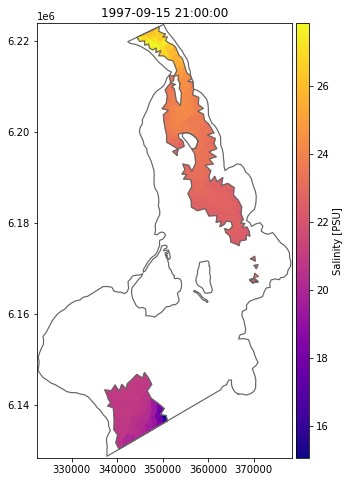

In [18]:
ax = da.plot(cmap='plasma');
dfs.geometry.plot.outline(ax=ax, title=None);